In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from textblob import TextBlob
from datetime import datetime
import statsmodels.api as sm

%matplotlib inline

In [18]:
usa_trending = pd.read_csv("../data/USvideos.csv", warn_bad_lines=True)

In [19]:
#keep relevant columns
usa_trending = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']]#.copy()
#print(usa_trending.category_id.unique())

In [20]:
# fix dates
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

for index, row in usa_trending.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    usa_trending.set_value(index,'trending_date', changed_date)

usa_trending['trending_date'] = pd.to_datetime(usa_trending['trending_date'])

/home/shit/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [21]:
usa_trending.tail()

,trending_date,category_id,views,likes,dislikes,comment_count
40944,2018-06-14,15,1685609,38160,1385,2657
40945,2018-06-14,22,1064798,60008,382,3936
40946,2018-06-14,24,1066451,48068,1032,3992
40947,2018-06-14,1,5660813,192957,2846,13088
40948,2018-06-14,20,10306119,357079,212976,144795


/home/shit/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


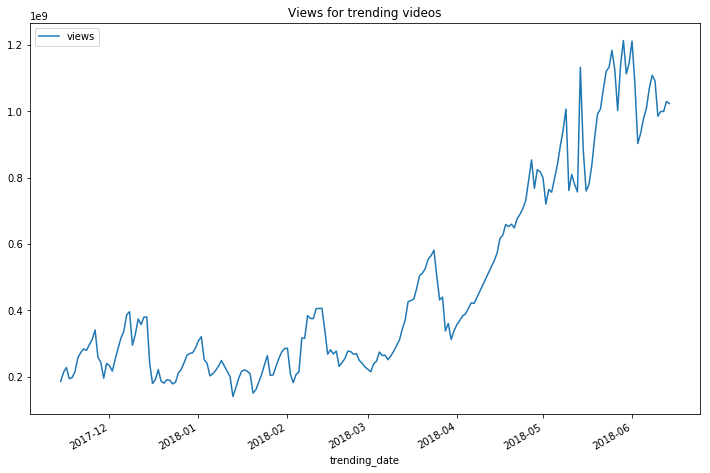

In [22]:
usa_trending.groupby('trending_date')['views'].agg({"views": "sum"}).plot(figsize=(12,8))
plt.title("Views for trending videos")
plt.show()

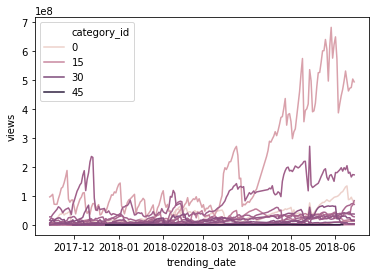

In [23]:
# Plot time series dataset
views_by_category = usa_trending.groupby(['trending_date', 'category_id']).agg({"views": "sum"})
views_by_category = pd.DataFrame(views_by_category.to_records())  # flatten multiindex

sns.lineplot(x="trending_date",
             y="views",
             hue="category_id",
             data=views_by_category)

plt.show()

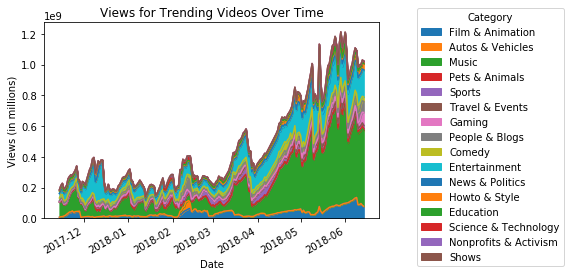

In [24]:
#print(agg_by_category.head(10))
# convert long format to wide for area chart 
views_wide_format = pd.pivot_table(views_by_category, index='trending_date', columns=["category_id"])
views_wide_format = pd.DataFrame(views_wide_format.to_records())  # flatten column multiindex
views_wide_format.set_index("trending_date", inplace=True)
#wide_format.columns = [1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]
views_wide_format.columns = ["Film & Animation", "Autos & Vehicles", "Music", 
                       "Pets & Animals", #15
                      "Sports",
                      "Travel & Events",
                      "Gaming", #20,
                      "People & Blogs",
                      "Comedy",
                      "Entertainment",
                      "News & Politics",
                      "Howto & Style", #26
                      "Education",
                      "Science & Technology",
                      "Nonprofits & Activism",
                      "Shows"]  #43
views_wide_format.fillna(0, inplace=True)


ax = views_wide_format.plot.area()
plt.title("Views for Trending Videos Over Time")
plt.ylabel("Views (in millions)")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes, title="Category")
plt.savefig("views_Trending_videos_stacked_area_plot.png")
plt.show()

The videos that happened to be trending started getting much more views.

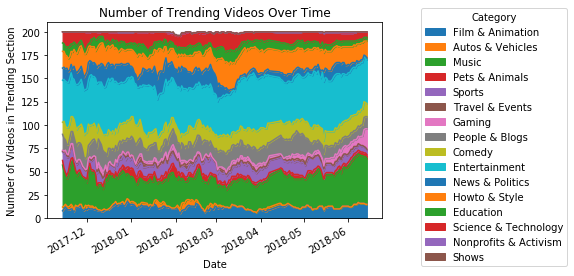

In [25]:
# this time, instead of aggregating views, lets look at whether a category had a trending video representing that category
count_by_category = usa_trending.groupby(['trending_date', 'category_id']).agg({"views": "count"})
count_by_category = pd.DataFrame(count_by_category.to_records())  # flatten multiindex

count_wide_format = pd.pivot_table(count_by_category, index='trending_date', columns=["category_id"])
count_wide_format = pd.DataFrame(count_wide_format.to_records()) #, index='trending_date')  # flatten column multiindex
count_wide_format.set_index("trending_date", inplace=True)
#wide_format.columns = [1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]
count_wide_format.columns = ["Film & Animation", "Autos & Vehicles", "Music", 
                       "Pets & Animals", #15
                      "Sports",
                      "Travel & Events",
                      "Gaming", #20,
                      "People & Blogs",
                      "Comedy",
                      "Entertainment",
                      "News & Politics",
                      "Howto & Style", #26
                      "Education",
                      "Science & Technology",
                      "Nonprofits & Activism",
                      "Shows"]  #43
count_wide_format.fillna(0, inplace=True)

ax = count_wide_format.plot.area()
plt.title("Number of Trending Videos Over Time")
plt.ylabel("Number of Videos in Trending Section")
plt.xlabel("Date")
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes, title="Category")
plt.savefig("count_videos_stacked_area_plot.png")
plt.show()

# Google trends

## big correlation matrix

In [76]:
this_is_america = pd.read_csv("../data/goog_this_is_america.csv", names=["Date", "searches"], header=1,
                              na_values='<1',
                             parse_dates=["Date"])
goog_movie = pd.read_csv("../data/goog_movie.csv", names=["Date", "searches"], header=1,
                                                  na_values='<1',
                             parse_dates=["Date"])#.fillna(value=0.5)
goog_btc = pd.read_csv("../data/goog_bitcoin.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_buy = pd.read_csv("../data/goog_buy.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_cryptocurrency = pd.read_csv("../data/goog_cryptocurrency.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_nfl = pd.read_csv("../data/goog_nfl.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_russia_collusion = pd.read_csv("../data/goog_russia_collusion.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_stack_overflow = pd.read_csv("../data/goog_stack_overflow.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_travel = pd.read_csv("../data/goog_travel.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)
goog_trump = pd.read_csv("../data/goog_trump.csv", names=["Date", "searches"], header=1,
                      na_values="<1",
                      parse_dates=["Date"])#.fillna(value=0.5, inplace=True)

merged_df = count_by_category[count_by_category["category_id"] == 10]

#print(this_is_america)
for df, suffix in zip([this_is_america, goog_movie, goog_btc, goog_buy, goog_cryptocurrency, goog_nfl, goog_russia_collusion,
          goog_stack_overflow, goog_travel, goog_trump],
              ["america", "movie", "btc", "buy", "crypto", "nfl", "russia", "SO", "travel", "Trump"]):
    #print(suffix)
    merged_df = pd.merge(merged_df, df, how='outer', 
               left_on="trending_date", right_on="Date",
                suffixes=["left", suffix])

# drop dates, categories, duplicate date cols
merged_df.drop(merged_df.columns[[1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]], axis=1, inplace=True)
#print(merged_df.columns)
trend_col_labels = ["Date", "😈 This is America", "😈 Movie", "😈 Bitcoin", "😈 Buy", "😈 Cryptocurrency", 
                     "😈 NFL", "😈 Russia Collusion",
                     "😈 Stack Overflow", "😈 Travel", "😈 Trump"]
merged_df.columns = trend_col_labels
#print(merged_df.head())
merged_df = pd.merge(merged_df, views_wide_format, how='outer', 
               left_on="Date", right_on="trending_date")

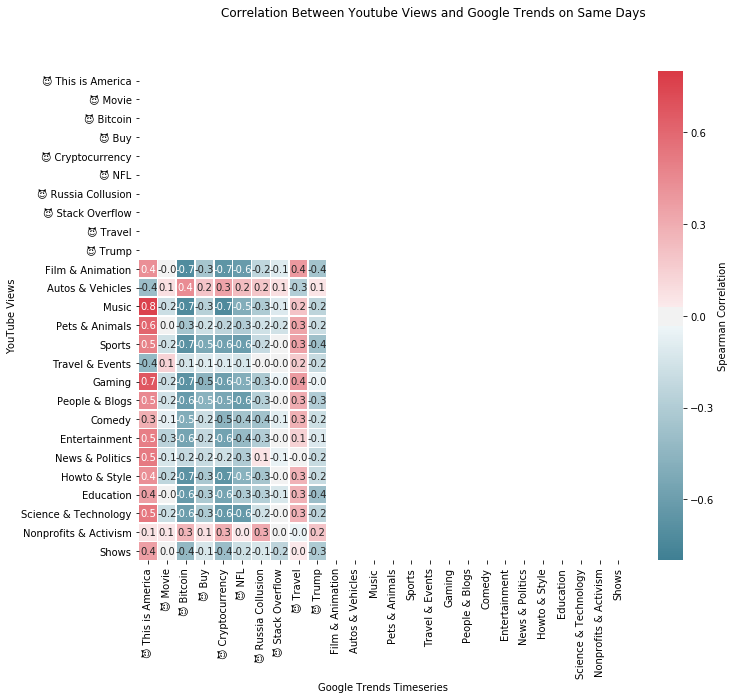

In [103]:
# -*- coding: utf-8 -*-
import matplotlib
matplotlib.rc('font', family='Arial')

# Compute the correlation matrix
corr = merged_df.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[0:len(trend_col_labels)-1,0:len(trend_col_labels)-1] = True
mask[:,len(trend_col_labels)-1:] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"label": "Spearman Correlation"},
           vmin=-.8, vmax=.8, annot=True, fmt='.1f')
plt.xlabel("Google Trends Timeseries")
plt.ylabel("YouTube Views")
plt.suptitle("Correlation Between Youtube Views and Google Trends on Same Days")
plt.savefig("correlation.png")
plt.show()

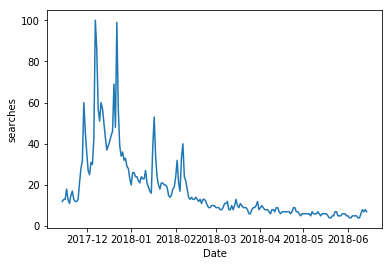

In [106]:
sns.lineplot(x="Date",
             y=goog_btc.searches.fillna(0),
             #hue="category_id",
             data=goog_btc)

## music and "This is America"

In [33]:
this_is_america = pd.read_csv("../data/goog_this_is_america.csv", names=["Date", "searches"], header=1,
                              na_values='<1',
                             parse_dates=["Date"])
print(this_is_america)

          Date  searches
0   2017-11-14       1.0
1   2017-11-15       1.0
2   2017-11-16       1.0
3   2017-11-17       1.0
4   2017-11-18       NaN
5   2017-11-19       NaN
6   2017-11-20       1.0
7   2017-11-21       NaN
8   2017-11-22       NaN
9   2017-11-23       NaN
10  2017-11-24       NaN
11  2017-11-25       NaN
12  2017-11-26       NaN
13  2017-11-27       1.0
14  2017-11-28       1.0
15  2017-11-29       NaN
16  2017-11-30       1.0
17  2017-12-01       1.0
18  2017-12-02       NaN
19  2017-12-03       NaN
20  2017-12-04       1.0
21  2017-12-05       1.0
22  2017-12-06       1.0
23  2017-12-07       1.0
24  2017-12-08       1.0
25  2017-12-09       NaN
26  2017-12-10       NaN
27  2017-12-11       1.0
28  2017-12-12       1.0
29  2017-12-13       1.0
..         ...       ...
183 2018-05-16      31.0
184 2018-05-17      26.0
185 2018-05-18      24.0
186 2018-05-19      18.0
187 2018-05-20      17.0
188 2018-05-21      14.0
189 2018-05-22      13.0
190 2018-05-23      11.0


In [12]:
this_is_america.fillna(value=0.5, inplace=True)
print(len(this_is_america), len(count_by_category[count_by_category["category_id"] == 10]))
music = pd.merge(this_is_america, count_by_category[count_by_category["category_id"] == 10], how='outer', 
               left_on="Date", right_on="trending_date")

213 205


In [13]:

print(music[["searches", "views"]].corr(method='spearman'))

          searches     views
searches  1.000000  0.453635
views     0.453635  1.000000


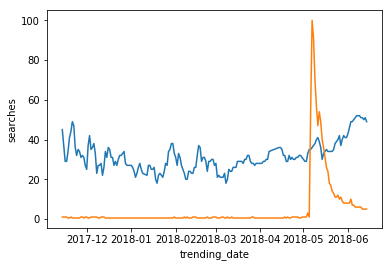

In [16]:
# print(music.trending_date.unique)

#print(music.tail())
sns.lineplot(x="trending_date",
             y=music.views,
             #hue="category_id",
             data=music)
sns.lineplot(x="trending_date",
             y=music.searches.fillna(0),
             #hue="category_id",
             data=music)

plt.show()

that was a dud

# movies

btc = pd.read_csv("../data/goog_bitcoin.csv", names=["Date", "searches"], header=1)


In [108]:
goog_movie = pd.read_csv("../data/goog_movie.csv", names=["Date", "searches"], header=1,
                                                  na_values='<1',
                             parse_dates=["Date"]).fillna(value=0.5)

"""
category_id key:
1 film & animation
30 movie
44 trailers
"""
movie = pd.merge(goog_movie, agg_by_category[agg_by_category["category_id"] == 1], how='outer', 
               left_on="Date", right_on="trending_date")

#print(agg_by_category[agg_by_category["category_id"] == 44])
#print(movie)
movie_corr = movie[["searches", "views"]].corr(method='spearman')
print(movie_corr)

NameError: name 'agg_by_category' is not defined

These are barely correlated

In [ ]:
print(agg_by_category[agg_by_category["category_id"] == 1])

In [ ]:

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(movie_corr,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

# cointegration models

In [107]:
# fill empty vals
movie.views.fillna(0, inplace=True)

# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(movie.searches, label='Google Trend')
plt.plot(movie.views, label='Youtube Trending Views')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(movie.views-movie.searches, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

NameError: name 'movie' is not defined

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_views = adfuller(movie.views)
print("The p-value for the ADF test on views is ", result_views[1])
result_searches = adfuller(movie.searches)
print("The p-value for the ADF test on searches is ", result_searches[1])

# Compute the ADF of the spread
result_spread = adfuller(movie.views-movie.searches)
print("The p-value for the ADF test on the spread is ", result_spread[1])


According to the ADF tests, we cannot reject the null hypothesis that the views data is a random walk. However, we could reject the null hypothesis that the searches and spreads are a random walk; i.e. they are not a random walk. This is obvious given their regular periodicity. 

Given that the high ADF value on the spread, it's unlikely these two are cointegrated.

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])
# 0.02, suggests they are cointegrated